Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# BVP: Boundary value problems
[Boundary value problems](https://en.wikipedia.org/wiki/Boundary_value_problem) (BVP) are very common in both theoretical (Sturm-Liuvoille problems) and engineering applications . In this case, boundary, not initial, conditions are specified. For example, you specify the initial and final positions of a particles, instead of the initial position and velocity. BVP are more difficult to solve, and also represent our first step towards partial differential equations. Here will learn how to use IVP techniques to solve BVP by using the so-called [shooting method](https://en.wikipedia.org/wiki/Shooting_method). We will also check an alternative formulation, in terms of [finite differences](https://en.wikipedia.org/wiki/Finite_difference_method), where the BVP will be written as a matrix problem that will be solved using the previously seen techniques. We will also compare our solutions with the ones obtained from using `scipy` and the `solve_ivp` method, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html.

# Shooting method
The [shooting method](https://en.wikipedia.org/wiki/Shooting_method) uses IVP solutions to estimate the best initial condition to solve the BVP. Imagine that you want to estimate the initial velocity for the cannon ball in order to make sure that it hits a given target at position $b$. 

<figure>
<img src="https://pythonnumericalmethods.berkeley.edu/_images/23.02.01-shooting.png" width=60%>
<figcaption>Reproducido de: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.02-The-Shooting-Method.html </figcaption>
</figure>

## Linear shooting method: interpolation

The *linear* shooting method solves the problem for two different initial conditions, and from them computes the exact initial conditions needed.  Then it solves again the BVP as a simple IVP given the extra and correct initial condition found. Let's assume we have a linear second order equation. If you put the initial values $(y_{0}, v_{0a})$, you get the final value $y_{fa}$ (first ICP solution). If you put the initial values $(y_{0}, v_{0b})$, you get the final value $y_{fb}$ (second IVP solution). By taking into account the linear nature of the problem, we can compute the straight-line equation in the $v_0 - y_f$ space to get the right initial condition as 
\begin{equation}
v_0 = v_{0a} + \frac{y_f - y_{fa}}{y_{fb} - y_{fa}}(v_{0b} - v_{0a}).
\end{equation}
Then, by using that initial condition, we compute the actual solution (third IVP solution).

As an example, let's solve the following problem (Chapra 24.11): Compound $A$ diffuses through a 4-cm-long tube and reacts as it diffuses. The process can be  modeled as

\begin{equation}
D\frac{d^2A}{dx^2} - kA = 0.  
\end{equation}
At $x=0$ there is a large source of $A$ with fixed concentration of $0.1$ M. At the other end there is a material that quickly absorbs $A$, so the concentration is 0 M. If $D = 1.5\times 10^{-6}$ cm$^2$/s and $k = 5\times 10^{-6}$ s$_1$, what is the concentration along the tube?

Write a function that returns the correct initial derivative value and plots the concentration along the tube.

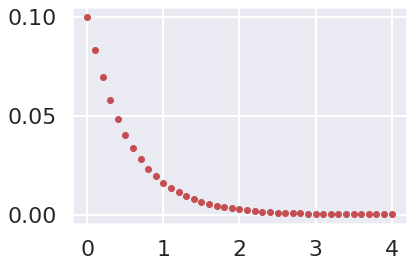

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

sns.set()
sns.set_context("poster")

def deriv(x, y, params):
    return [y[1], params[1]*y[0]/params[0]]

def mysolve_bvp(y0, yf, v0a, v0b, x0, xf, dx, params):
    
    X = np.arange(x0, xf + dx, dx)

    Y0b=[ y0, v0b]
    Y0a=[ y0, v0a]

    
    sola = solve_ivp(deriv, t_span=[X.min(),  X.max()], y0=Y0a, t_eval=X, args = [params])
    ya = sola.y[0][-1] 

    solb = solve_ivp(deriv, t_span=[X.min(), X.max()], y0=Y0b, t_eval=X, args = [params])
    yb = solb.y[0][-1] 

    v0 = v0a + (yf - ya)*(v0b - v0a)/(yb - ya)

    sol = solve_ivp(deriv, t_span=[X.min(),  X.max()], y0=[y0,v0], t_eval=X, args = [params])

    plt.plot(sol.t,sol.y[0],"r.")
    plt.show()

PARAMS = (1.5e-6, 5e-6)
mysolve_bvp(0.1, 0.0, -0.23, -0.14, 0.0, 4.0, 0.1, PARAMS)

## Linear shooting method: root finding 
The previous problem can be written as a root finding procedure. If we see the IVP solution as a function of the initial velocity condition, $y_f = g(v_0)$ (plus other parameters), then we can see this problem as a root finding one, looking for the right $v_0$ that gives $h(v_0) = 0 = g(v_0) - y_f$. As you can see later, this will allow us to extend the shooting method to non-linear problems. Python allows us to compute roots using the `scipy.optimize.root` method, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html .

El método del disparo permite resolver EDOs no lineales de segundo orden de la forma:

$$y\prime\prime = f(x,y,y\prime) \qquad a\leq x \leq b$$
$$y(a)=\alpha \qquad y(b)=\beta$$
Que consiste en resolver el problema de valor inicial:

$$y\prime\prime = f(x,y,y\prime) \qquad a\leq x \leq b$$
$$y(a)=\alpha \qquad y\prime(a)=M$$

Para eso se define la función:
$$F(M_k) = y(M_k;b) -\beta $$
Si le enontramos las raices a esta función enctoraremos el valor $M_k$ para el cual 
$$y(M_k;b) = \beta $$
Asi el problema incial es equivalente a resolver
$$y\prime\prime = f(x,y,y\prime) \qquad a\leq x \leq b$$
$$y(a)=\alpha \qquad y\prime(a)=M_k$$

/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


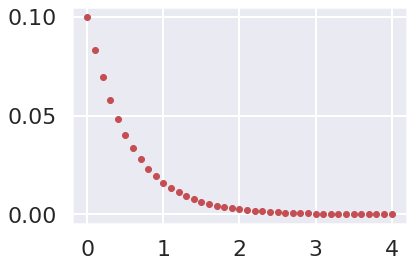

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

sns.set()
sns.set_context("poster")

def deriv(t, y, params):
    return [y[1], params[1]*y[0]/params[0]]

def h(v0, y0, yf, t0, tf, dt, params):
    return solve_ivp(deriv, [t0, tf], [y0, v0], t_eval=np.arange(t0, tf+dt, dt),
                     args=(params,)).y[0][-1] - yf
    

def solve_bvp_root(y0, yf, v0, t0, tf, dt, params):

    # Compute the root : v0 such us h(v0)=0
    v0 = root(h, v0, args=(y0, yf, t0, tf, dt, params)).x[0]

    #Use the solution and solve the ivp
    sol = solve_ivp(deriv, [t0, tf], [y0, v0], t_eval=np.arange(t0, tf+dt, dt),
                     args=(params,))
    
    #plot
    plt.plot(sol.t, sol.y[0],"r.")
    
PARAMS = (1.5e-6, 5e-6)
solve_bvp_root(0.1, 0.0, -0.23, 0.0, 4.0, 0.1, PARAMS)

## Non linear shooting method
As we said, formulating the problem as a root finding one allows us to extend the method to non-linear systems (there are even better generalization like the  https://en.wikipedia.org/wiki/Direct_multiple_shooting_method). Let's now solve the same problem but adding some  drag coefficient, $f_v = -b v$

/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


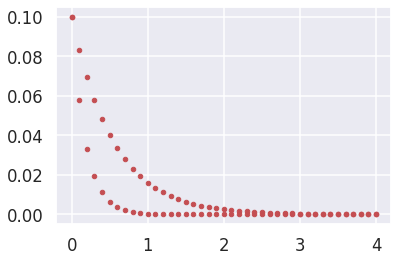

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root
sns.set()
sns.set_context("talk")

def deriv(t, y, params):
    return [y[1], params[1]*y[0]/params[0] - params[2]*y[1]]

def h(v0, y0, yf, t0, tf, dt, params):
    return solve_ivp(deriv, [t0, tf], [y0, v0], t_eval=np.arange(t0, tf+dt, dt),
                     args=(params,)).y[0][-1] -yf
    

def solve_bvp_root(y0, yf, v0, t0, tf, dt, params):

    # Compute the root : v0 such us h(v0)=0
    v0 = root(h, v0, args=(y0, yf, t0, tf, dt, params)).x[0]

    #Use the solution and solve the ivp
    sol = solve_ivp(deriv, [t0, tf], [y0, v0], t_eval=np.arange(t0, tf+dt, dt),
                     args=(params,))
    
    #plot
    plt.plot(sol.t, sol.y[0],"r.")

PARAMS = (1.5e-6, 5e-6, 0.0)
solve_bvp_root(0.1, 0.0, -0.23, 0.0, 4.0, 0.1, PARAMS)
PARAMS = (1.5e-6, 5e-6, 4.8920)
solve_bvp_root(0.1, 0.0, +0.33, 0.0, 4.0, 0.1, PARAMS)

# Using `scipy`: `solve_bvp`
The `scipy` module offers an useful function, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html , to solve the problems we have been exploring. Check the manual and adapt the method

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.optimize import root
sns.set()
sns.set_context("talk")

def deriv(t, y, params):
    return [y[1], params[1]*y[0]/params[0] - params[2]*y[1]]

def bc(ya, yb, params):
    return [ya[0]-0.1, yb[0], *params]

def solve_bvp_plot(x0, xf, y0, yf, params):
    
    N=50
    deriv = lambda t,y: deriv(t, y, params)
    bc = lambda t,y: bc(t, y, params)
    
    sol = solve_bvp(deriv, bc, np.linspace(x0, xf, N), np.zeros((2,N)),p=None)
    plt.plot(sol.x, sol.y[0],".")


PARAMS = (1.5e-6, 5e-6, 0.0)
solve_bvp_plot(0.0, 4.0, 0.1, 0.0, PARAMS)
PARAMS = (1.5e-6, 5e-6, 320.8920)
solve_bvp_plot(0.0, 4.0, 0.1, 0.0, PARAMS)


TypeError: ignored